In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Pixel sorting

### Read in an Image

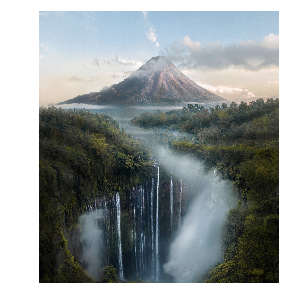

In [3]:
img = cv2.imread('../local_files/images/jungle.png')

# convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.axis('off')

# show original image
plt.imshow(img)

### Speeding it up with Numpy

In [6]:
def np_pixel_sort(img, min_b, max_b):
    weights = [.33, .50, .16]
    flat_img = img.reshape(-1,3)                                              # flatten image
    brights = np.sum((flat_img * weights), axis=1)                            # get brightness using weights
    to_split = np.where((brights > max_b) | (brights < min_b))[0]             # split img on light/dark pixels
    flat_splits = np.split(flat_img, to_split)                                # split flat img on brightness
    splits = np.split(brights, to_split)                                      # split original img on brightness
    frames = [flat_splits[sub][splits[sub].argsort()]                         # sort 1 arr by the other
              for sub in range(len(splits))]
    return np.concatenate(frames, axis=0).reshape(img.shape)

CPU times: user 4.31 s, sys: 227 ms, total: 4.54 s
Wall time: 4.54 s


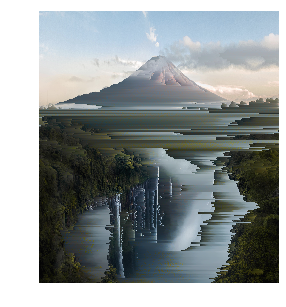

In [7]:
%%time

out = np_pixel_sort(img=img, min_b=35, max_b=175)

plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(out)

#### Todo:

In [21]:
# sorts entire image only
def sort_all(img):
    flat_img = img.reshape(-1,3)
    weights = [.33, .50, .16]
    pos_sorted = np.sum((flat_img * weights), axis=1).argsort()
    return flat_img[pos_sorted,:].reshape(img.shape)